In [ ]:





import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
# sklearn Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split data with stratified cv
from sklearn.model_selection import StratifiedKFold, train_test_split

# Encoding of classifications
from sklearn.preprocessing import LabelEncoder


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import relu
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

In [ ]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
from tensorflow.keras.utils import to_categorical, normalize

In [ ]:
File_Addr1=r"C:\Users\ASUS\Desktop\Project\TorCSV\CSV\Scenario-A\TimeBasedFeatures-15s-TOR-NonTOR-15.csv"
File_Addr2=r"C:\Users\ASUS\Desktop\Project\TorCSV\CSV\Scenario-A\TimeBasedFeatures-30s-TORNonTOR-15.csv"
File_Addr3=r"C:\Users\ASUS\Desktop\Project\TorCSV\CSV\Scenario-A\TimeBasedFeatures-60s-TOR-NonTOR-15.csv"
File_Addr4=r"C:\Users\ASUS\Desktop\Project\TorCSV\CSV\Scenario-A\TimeBasedFeatures-120s-TOR-NonTOR-15.csv"
File_Addr_To_Save=r"C:\Users\ASUS\Desktop\Project\TorCSV\CSV\Scenario-A\all.csv"


## DS1 Import ##
DS1=pd.read_csv(File_Addr1)
DS1.columns=['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat','max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond','flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat','std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active','min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']
shape1=DS1.shape
print(shape1)
print("Columns:",DS1.columns,"\n","Rows:",DS1.index)
DS1.head(10)


## DS2 Import ##
DS2=pd.read_csv(File_Addr2)
DS2.columns=['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat','max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond','flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat','std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active','min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']
shape2=DS2.shape
print(shape2)
print("Columns:",DS2.columns,"\n","Rows:",DS2.index)
DS2.head(10)


## DS3 Import ##
DS3=pd.read_csv(File_Addr3)
DS3.columns=['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat','max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond','flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat','std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active','min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']
shape3=DS3.shape
print(shape3)
print("Columns:",DS3.columns,"\n","Rows:",DS3.index)
DS3.head(10)


## DS4 Import ##
DS4=pd.read_csv(File_Addr4)
DS4.columns=['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat','max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond','flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat','std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active','min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1']
shape4=DS4.shape
print(shape4)
print("Columns:",DS4.columns,"\n","Rows:",DS4.index)
DS4.head(10)

""" Merge 4 Dataset in DS """

temp = [DS1,DS2,DS3,DS4]
DS=pd.concat(temp)
shape=DS.shape
print(shape)
print("Columns:",DS.columns,"\n","Rows:",DS.index)
DS.head(10)


""" Save in a New Dataset """
DS.to_csv(File_Addr_To_Save)


""" Load DS """


""" ----------------------------  Dataset Preprocessing --------------------------"""

""" Check the Null Value in DS """
tmp=DS.isna().sum() # if All Columns are 0 (Zero), This dataset is okey!!

for i in range(len(tmp)):
    if tmp[i]!=0:
        print("Num:", tmp[i], "index:", i)
        
 ## ]In this section Index of Columns which have null value
 

(3311, 24)
Columns: Index(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat',
       'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active',
       'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1'],
      dtype='object') 
 Rows: RangeIndex(start=0, stop=3311, step=1)
(2464, 24)
Columns: Index(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat',
       'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active',
       'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1'],
      dtype='object') 
 Rows: RangeIndex(start=0, stop=2464, step=1)
(2465, 24)
Columns: Index(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'mi

In [ ]:
dataset=pd.read_csv(r'C:\Users\ASUS\Desktop\Project\TorCSV\CSV\Scenario-A\all.csv')
dataset.head()

,Unnamed: 0,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,0,13978645,17,7,2249885,2064514,215483.375000,254157.181818,484527.921325,462592.986971,...,334260.192004,1363299,2.254176e+06,3870047,1.010714e+06,1147658,1.533122e+06,2064514,4.218329e+05,NONTOR
1,1,5545334,30,6,2349340,2315198,267851.550000,291859.684211,662553.265035,667200.262669,...,468135.293018,2347008,2.656002e+06,2964996,4.369835e+05,1978303,2.138028e+06,2297754,2.258860e+05,NONTOR
2,2,14701087,20,5,5881392,5932194,284572.901961,341885.744186,889248.028147,946533.667755,...,649646.590333,2757283,4.248801e+06,6270335,1.815508e+06,1297996,3.043251e+06,5881355,2.479422e+06,NONTOR
3,3,57245,-1,-1,-1,-1,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,NONTOR
4,4,57532,-1,-1,-1,-1,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,NONTOR


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9928 non-null   int64  
 1   duration            9928 non-null   int64  
 2   total_fiat          9928 non-null   int64  
 3   total_biat          9928 non-null   int64  
 4   min_fiat            9928 non-null   int64  
 5   min_biat            9928 non-null   int64  
 6   max_fiat            9928 non-null   float64
 7   max_biat            9928 non-null   float64
 8   mean_fiat           9928 non-null   float64
 9   mean_biat           9928 non-null   float64
 10  flowPktsPerSecond   9928 non-null   float64
 11  flowBytesPerSecond  9928 non-null   float64
 12  min_flowiat         9928 non-null   int64  
 13  max_flowiat         9928 non-null   int64  
 14  mean_flowiat        9928 non-null   float64
 15  std_flowiat         9928 non-null   float64
 16  min_ac

In [ ]:
dataset.class1.value_counts()

NONTOR    8946
TOR        982
Name: class1, dtype: int64

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
dataset['class1']= label_encoder.fit_transform(dataset['class1']) 
dataset['class1'].unique()

array([0, 1])

In [ ]:
dataset.head(2)

,Unnamed: 0,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,0,13978645,17,7,2249885,2064514,215483.375,254157.181818,484527.921325,462592.986971,...,334260.192004,1363299,2254176.2,3870047,1.010714e+06,1147658,1533121.8,2064514,421832.929403,0
1,1,5545334,30,6,2349340,2315198,267851.550,291859.684211,662553.265035,667200.262669,...,468135.293018,2347008,2656002.0,2964996,4.369835e+05,1978303,2138028.5,2297754,225885.968355,0


In [ ]:
N = 2
# Drop first N columns of dataframe
data = dataset.iloc[: , 1:]

In [ ]:
data.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,max_flowiat,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle
0,13978645,17,7,2249885,2064514,215483.375000,254157.181818,484527.921325,462592.986971,8.656061,...,2064514,116488.708333,334260.192004,1363299,2.254176e+06,3870047,1.010714e+06,1147658,1.533122e+06,2064514
1,5545334,30,6,2349340,2315198,267851.550000,291859.684211,662553.265035,667200.262669,7.393603,...,2297754,138633.350000,468135.293018,2347008,2.656002e+06,2964996,4.369835e+05,1978303,2.138028e+06,2297754
2,14701087,20,5,5881392,5932194,284572.901961,341885.744186,889248.028147,946533.667755,6.530129,...,5881355,154748.284211,649646.590333,2757283,4.248801e+06,6270335,1.815508e+06,1297996,3.043251e+06,5881355
3,57245,-1,-1,-1,-1,0.000000,0.000000,0.000000,0.000000,34.937549,...,57245,57245.000000,0.000000,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,-1
4,57532,-1,-1,-1,-1,0.000000,0.000000,0.000000,0.000000,34.763262,...,57532,57532.000000,0.000000,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,-1


In [ ]:
data=data.iloc[:,0:22]

In [ ]:
features = dataset.iloc[:,1:23].values
labels = dataset.iloc [:,24].values

In [ ]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

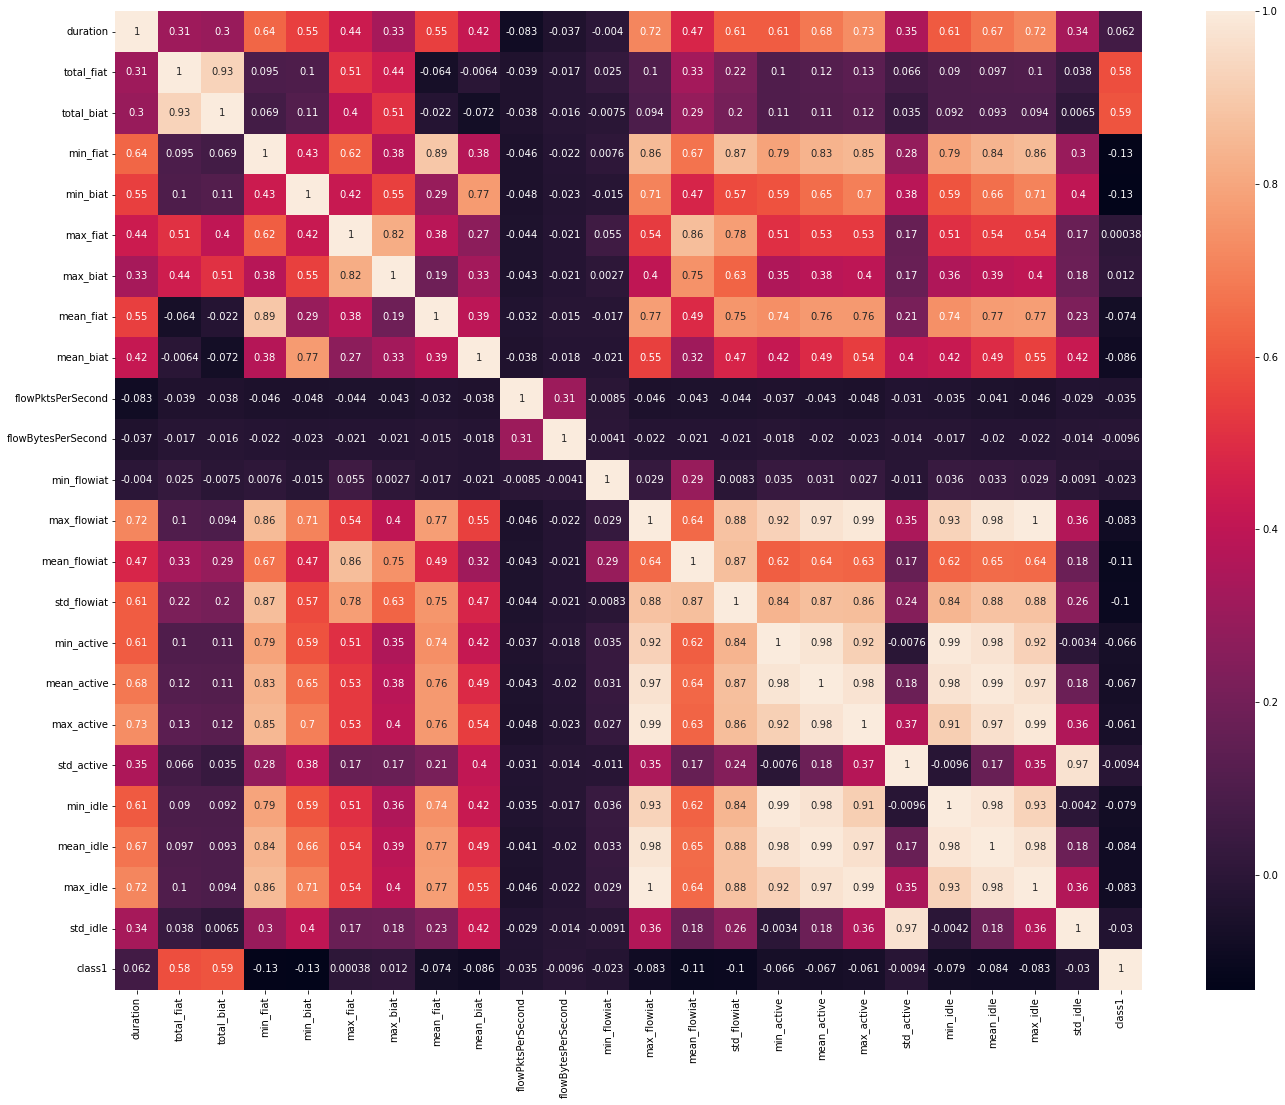

In [ ]:

import seaborn as sns
fig,(ax0) = plt.subplots(nrows=1, figsize=(23,18))
# checking correlation using heatmap
#Loading dataset
#flights = sns.load_dataset("dataset")
  
#ploting the heatmap for correlation
ax = sns.heatmap(data.corr(), annot=True)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
features = dataset.iloc[:,1:23].values
labels = dataset.iloc [:,-1].values

[0.01414396 0.36403637 0.30765133 0.0477478  0.05110492 0.03047556
 0.02997857 0.00751273 0.00729009 0.00826354 0.00936128 0.00404883
 0.01108402 0.02370527 0.02519471 0.01349113 0.00327207 0.00625545
 0.00128319 0.01313066 0.00979024 0.01117828]


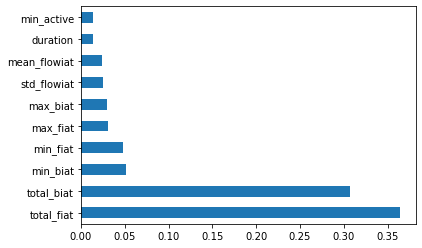

In [ ]:
X = dataset.iloc[:,1:23].values #independent columns
y =dataset.iloc [:,24].values   #target column i.e price range
#apply SelectKBest class to extract top 10 best features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

# Neural Network

In [ ]:
model = Sequential()
model.add(Dense(units= 50, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\ASUS\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
import time
tic=time.time()
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=64, epochs=50)
acc_testing  = model.evaluate(testing_data, testing_label)
toc=time.time()
print("Time Taken is:")
print(toc-tic)

Epoch 1/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.0143 - val_accuracy: 0.9965
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.0142 - val_accuracy: 0.9965
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.0129 - val_accuracy: 0.9970
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9976 - val_loss: 0.0141 - val_accuracy: 0.9970
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0260 - val_accuracy: 0.9945
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.0142 - val_accuracy: 0.9970
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.0129 - val_accuracy: 0.9970
Epoch 

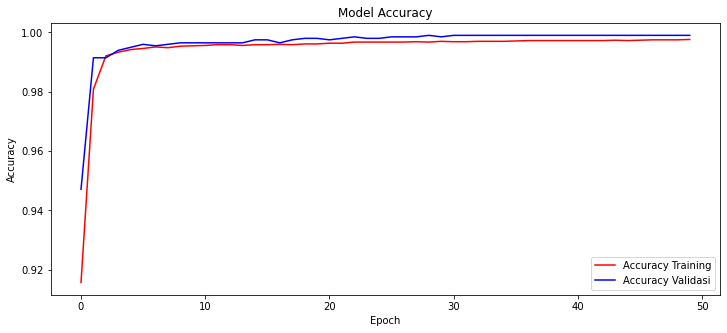

In [ ]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Accuracy Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Accuracy Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()

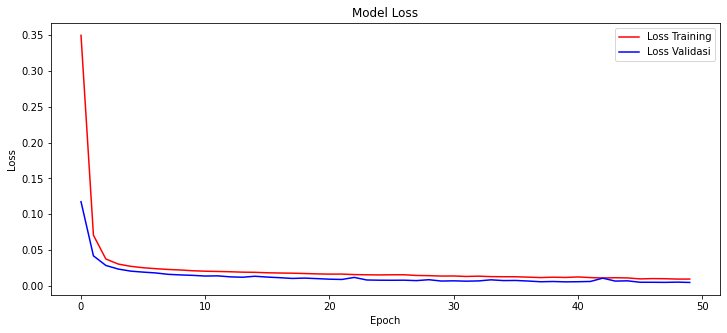

In [ ]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

In [ ]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [ ]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())

In [ ]:
testing_cm

tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.998992950654582
Specificity testing 0.9897959183673469
Sensitivity testing 1.0
Precision testing 0.9988839285714286
F1 Score testing 0.9994416527079844


Text(0, 0.5, 'Frequency')

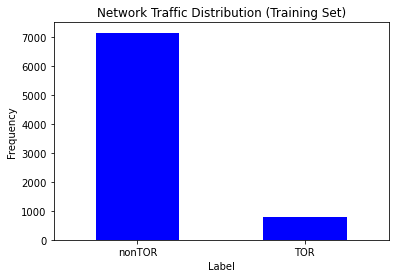

In [ ]:
label_l = ['nonTOR', 'TOR']
classes = pd.value_counts(training_label,)
classes.plot(kind = 'bar', rot = 0, color = "blue")
plt.title("Network Traffic Distribution (Training Set)")
plt.xticks(range(2), label_l)
plt.xlabel("Label")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

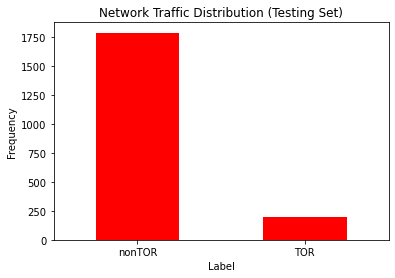

In [ ]:
label_l = ['nonTOR', 'TOR']
classes = pd.value_counts(testing_label,)
classes.plot(kind = 'bar', rot = 0, color = "red")
plt.title("Network Traffic Distribution (Testing Set)")
plt.xticks(range(2), label_l)
plt.xlabel("Label")
plt.ylabel("Frequency")

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=4,p=1 )
tic=time.time()
model.fit(training_data,  training_label)
Accuracy = model.score(testing_data, testing_label)

toc=time.time()

In [ ]:
Accuracy

0.9974823766364552

In [ ]:
print(toc-tic)

1.0806093215942383


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=32)

# SVM Time

In [ ]:
tic=time.time()
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1796
           1       1.00      0.91      0.95       190

    accuracy                           0.99      1986
   macro avg       1.00      0.96      0.97      1986
weighted avg       0.99      0.99      0.99      1986

Time Taken:
0.416856050491333


# Decision Tree Time

In [ ]:
tic=time.time()
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       0.99      0.99      0.99       403

    accuracy                           1.00      3972
   macro avg       1.00      1.00      1.00      3972
weighted avg       1.00      1.00      1.00      3972

Time Taken:
0.08214187622070312


# Random Forest Time

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
tic=time.time()
classifier = RF(n_estimators=8, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      0.99      0.99       190

    accuracy                           1.00      1986
   macro avg       1.00      0.99      1.00      1986
weighted avg       1.00      1.00      1.00      1986

Time Taken:
0.155625581741333


# Logistic Regression Time

In [ ]:
from sklearn.linear_model import LogisticRegression
tic=time.time()
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1796
           1       1.00      0.81      0.89       190

    accuracy                           0.98      1986
   macro avg       0.99      0.90      0.94      1986
weighted avg       0.98      0.98      0.98      1986

Time Taken:
0.05485415458679199


# PCA  and TSNE Implementation

In [ ]:
X = dataset.iloc[:,1:23].values
y = dataset.iloc [:,24].values

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#from sklearn.cluster import KMeans


In [ ]:
#kmeans = KMeans(n_clusters=2)
#kmeans.fit(features)


In [ ]:
#pca_e = PCA(n_components=2)
#pca_e_result = pca_e.fit_transform(features)

In [ ]:
#x = pca_e_result[:, 0]
#y = pca_e_result[:, 1]

#scatter = plt.scatter(x, y, c=kmeans.labels_, alpha=0.9, s= 800)
#plt.title('Tor Non Tor')
#plt.xlabel('PCA 1')
#plt.ylabel('PCA 2')

#plt.show()

In [ ]:
from sklearn.decomposition import PCA
train_PCA = PCA(n_components=2).fit_transform(features)
import matplotlib
%matplotlib inline
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
plt.title('Tor Non Tor')
plt.scatter(train_PCA[:,0],train_PCA[:,1],c=labels,cmap=plt.cm.jet)

In [ ]:
train_PCA

array([[-0.08163698, -0.00837747],
       [-0.08289481, -0.00891791],
       [-0.07541383,  0.00245462],
       ...,
       [ 1.03874426, -0.81068221],
       [ 0.98238468, -0.84387302],
       [ 0.98218985, -0.8437258 ]])

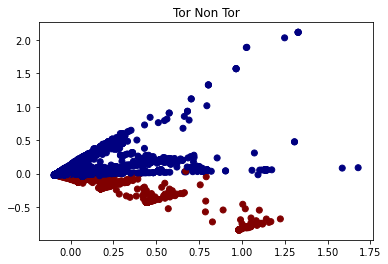

In [ ]:
import matplotlib
%matplotlib inline
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
plt.title('Tor Non Tor')
plt.scatter(train_PCA[:,0],train_PCA[:,1],c=labels,cmap=plt.cm.jet)

In [ ]:
from sklearn.manifold import TSNE
train_tsne = TSNE(n_components=2).fit_transform(features)
tsne_df = pd.DataFrame({'tsne1':train_tsne[:,0],
                        'tsne2':train_tsne[:,1],
                        'labels':labels})

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ASUS\AppData\Local\Temp/ipykernel_35164/2304619155.py", line 2, in <module>
    train_tsne = TSNE(n_components=2).fit_transform(features)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py", line 932, in fit_transform
    embedding = self._fit(X)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py", line 841, in _fit
    return self._tsne(P, degrees_of_freedom, n_samples,
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py", line 897, in _tsne
    params, kl_divergence, it = _gradient_descent(obj_func, params,
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py", line 363, in _gradient_descent
    error, grad = objective(p, *args, **kwargs)
  File "C:\Users\ASUS\anaconda3\lib\

TypeError: object of type 'NoneType' has no len()

In [ ]:
plt.title('Tor Non Tor')
plt.scatter(train_tsne[:,0],train_tsne[:,1],c=labels,cmap=plt.cm.jet)

In [ ]:
pca = PCA(n_components=2)
X_transform = pca.fit_transform(features)
X_transform

array([[-0.08163698, -0.00837747],
       [-0.08289481, -0.00891791],
       [-0.07541383,  0.00245462],
       ...,
       [ 1.03874426, -0.81068221],
       [ 0.98238468, -0.84387302],
       [ 0.98218985, -0.8437258 ]])

In [ ]:
X_transform = pd.DataFrame(data = X_transform, columns = ["principal component 1", "principal component 2"])
X_train, X_test, y_train, y_test = train_test_split(X_transform, labels, test_size=0.20, random_state=32)
from sklearn.metrics import classification_report

# TSNE Implementation

In [ ]:

from sklearn.manifold import TSNE

In [ ]:
# ploting the 2d data points with seaborn
import seaborn as sn

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


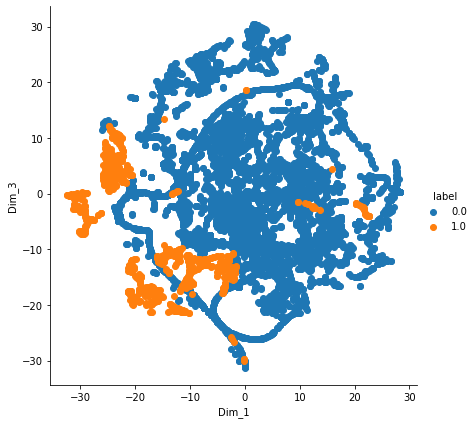

In [ ]:

model = TSNE(n_components=3, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(features)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","Dim_3", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_3').add_legend()
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


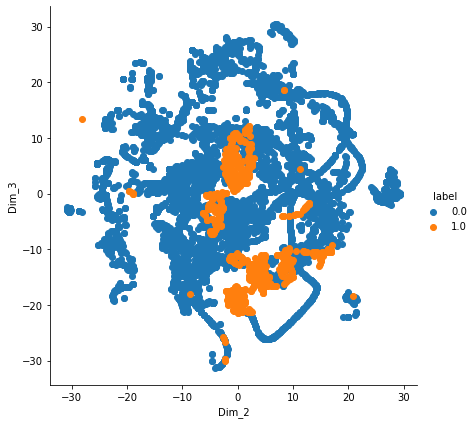

In [ ]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_2', 'Dim_3').add_legend()
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


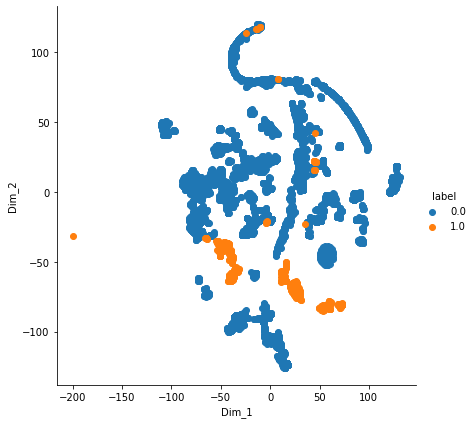

In [ ]:

model = TSNE(n_components=2, random_state=0,perplexity=50,  n_iter=5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(features)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
model = TSNE(n_components=2, random_state=0,perplexity=100,  n_iter=5000)

In [ ]:
X_transform =  model.fit_transform(features)
X_transform

array([[-45.668167 ,  -1.6954756],
       [-34.166073 , -14.001017 ],
       [-37.171803 ,   5.1364875],
       ...,
       [ 49.469555 , -49.24173  ],
       [ 50.00762  , -48.843174 ],
       [ 49.947502 , -49.283955 ]], dtype=float32)

In [ ]:
X_transform = pd.DataFrame(data = X_transform, columns = ["TSNE component 1", "TSNE component 2"])
X_train, X_test, y_train, y_test = train_test_split(X_transform, labels, test_size=0.20, random_state=32)
from sklearn.metrics import classification_report

In [ ]:
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [ ]:
import time
tic=time.time()
model = KNeighborsClassifier(n_neighbors=16,p=1 )
model.fit(X_train, y_train)
Accuracy = model.score(X_test, y_test)
print(Accuracy)
print("Time Taken with TSNE for KNN:")
toc=time.time()
print(toc-tic)

0.9969788519637462
Time Taken with TSNE for KNN:
0.15267252922058105


In [ ]:
tic=time.time()
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with TSNE for SVM:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1796
           1       1.00      0.89      0.94       190

    accuracy                           0.99      1986
   macro avg       0.99      0.95      0.97      1986
weighted avg       0.99      0.99      0.99      1986

Time Taken with TSNE for SVM:
0.35944557189941406


In [ ]:
tic=time.time()
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken for Decision Tree:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       0.99      0.97      0.98       190

    accuracy                           1.00      1986
   macro avg       0.99      0.99      0.99      1986
weighted avg       1.00      1.00      1.00      1986

Time Taken for Decision Tree:
0.04224824905395508


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
tic=time.time()
classifier = RF(n_estimators=8, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken for Random Forest:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       0.99      0.98      0.99       190

    accuracy                           1.00      1986
   macro avg       1.00      0.99      0.99      1986
weighted avg       1.00      1.00      1.00      1986

Time Taken for Random Forest:
0.1317133903503418


In [ ]:
from sklearn.linear_model import LogisticRegression
tic=time.time()
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken for Logistic Regression:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1796
           1       0.73      0.75      0.74       190

    accuracy                           0.95      1986
   macro avg       0.85      0.86      0.86      1986
weighted avg       0.95      0.95      0.95      1986

Time Taken for Logistic Regression:
0.04629826545715332


In [ ]:
from sklearn import svm

# SVM 

In [ ]:
import time

In [ ]:
tic=time.time()
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1796
           1       0.73      0.75      0.74       190

    accuracy                           0.95      1986
   macro avg       0.85      0.86      0.86      1986
weighted avg       0.95      0.95      0.95      1986

Time Taken:
0.4634876251220703


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT

In [ ]:
tic=time.time()
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       0.99      0.97      0.98       403

    accuracy                           1.00      3972
   macro avg       0.99      0.99      0.99      3972
weighted avg       1.00      1.00      1.00      3972

Time Taken:
0.04288458824157715


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
tic=time.time()
classifier = RF(n_estimators=8, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      0.99      0.99       190

    accuracy                           1.00      1986
   macro avg       1.00      0.99      1.00      1986
weighted avg       1.00      1.00      1.00      1986

Time Taken:
0.14053916931152344


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
tic=time.time()
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1796
           1       1.00      0.75      0.86       190

    accuracy                           0.98      1986
   macro avg       0.99      0.87      0.92      1986
weighted avg       0.98      0.98      0.97      1986

Time Taken:
0.04986572265625


# KNN

In [ ]:

#clf = svm.SVC(kernel='linear')
#clf.fit(X_train,y_train)


In [ ]:
tic=time.time()
clf = KNeighborsClassifier(n_neighbors=4,p=1 )

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1796
           1       1.00      0.93      0.96       190

    accuracy                           0.99      1986
   macro avg       1.00      0.97      0.98      1986
weighted avg       0.99      0.99      0.99      1986

Time Taken:
0.2958250045776367


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_sm = Scaler_X.fit_transform(features)

In [ ]:
encoder = Sequential()
encoder.add(Dense(units = 2, 
                  activation = 'sigmoid', 
                  input_shape = [22]))

decoder = Sequential()
decoder.add(Dense(units = 22, 
                  activation = 'sigmoid',
                  input_shape = [2]))

In [ ]:
Autoencoder = Sequential([encoder, decoder])

In [ ]:

from tensorflow.keras.optimizers import Adam

Autoencoder.compile(loss = 'mse', optimizer= 'Adam')

In [ ]:
Autoencoder.fit(X_sm,
                X_sm,
                epochs = 200)

Epoch 1/200
311/311 [==============================] - 1s 2ms/step - loss: 1.1737
Epoch 2/200
311/311 [==============================] - 1s 2ms/step - loss: 1.0300
Epoch 3/200
311/311 [==============================] - 1s 2ms/step - loss: 0.9678
Epoch 4/200
311/311 [==============================] - 1s 2ms/step - loss: 0.9404
Epoch 5/200
311/311 [==============================] - 1s 2ms/step - loss: 0.9241
Epoch 6/200
311/311 [==============================] - 1s 2ms/step - loss: 0.9114
Epoch 7/200
311/311 [==============================] - 1s 2ms/step - loss: 0.9000
Epoch 8/200
311/311 [==============================] - 0s 2ms/step - loss: 0.8892
Epoch 9/200
311/311 [==============================] - 1s 2ms/step - loss: 0.8787
Epoch 10/200
311/311 [==============================] - 1s 2ms/step - loss: 0.8685
Epoch 11/200
311/311 [==============================] - 1s 2ms/step - loss: 0.8588
Epoch 12/200
311/311 [==============================] - 1s 2ms/step - loss: 0.8495
Epoch 13/200


311/311 [==============================] - 1s 2ms/step - loss: 0.7309
Epoch 197/200
311/311 [==============================] - 1s 2ms/step - loss: 0.7309
Epoch 198/200
311/311 [==============================] - 1s 2ms/step - loss: 0.7309
Epoch 199/200
311/311 [==============================] - 1s 2ms/step - loss: 0.7308
Epoch 200/200
311/311 [==============================] - 1s 2ms/step - loss: 0.7308


In [ ]:
features_2d = encoder.predict(X_sm)

In [ ]:
features_2d.shape

(9928, 2)

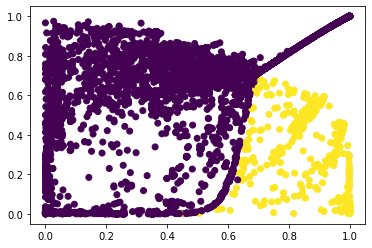

In [ ]:
plt.scatter(features_2d[:,0],features_2d[:,1], c = labels);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,labels, test_size=0.20, random_state=32)
from sklearn.metrics import classification_report

In [ ]:
import time
tic=time.time()
model = KNeighborsClassifier(n_neighbors=1,p=1 )
model.fit(X_train, y_train)
Accuracy = model.score(X_test, y_test)
print(Accuracy)
print("Time Taken with AutoEncoder for KNN:")
toc=time.time()
print(toc-tic)

0.998992950654582
Time Taken with AutoEncoder for KNN:
0.6511878967285156


In [ ]:
tic=time.time()
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with autoencoder for SVM:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      0.97      0.98       190

    accuracy                           1.00      1986
   macro avg       1.00      0.98      0.99      1986
weighted avg       1.00      1.00      1.00      1986

Time Taken with autoencoder for SVM:
0.18358564376831055


In [ ]:
tic=time.time()
classifier = DT(criterion='gini', random_state=20)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken for Decision Tree with autoencoder:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       0.99      0.99      0.99       190

    accuracy                           1.00      1986
   macro avg       0.99      1.00      1.00      1986
weighted avg       1.00      1.00      1.00      1986

Time Taken for Decision Tree with autoencoder:
0.1146998405456543


In [ ]:
tic=time.time()
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with autoencoder for Logistic Regression:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      0.97      0.98       190

    accuracy                           1.00      1986
   macro avg       1.00      0.98      0.99      1986
weighted avg       1.00      1.00      1.00      1986

Time Taken with autoencoder for Logistic Regression:
0.10671377182006836


In [ ]:
tic=time.time()
classifier = RF(n_estimators=2, criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with autoencoder for Random Forest:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1796
           1       1.00      0.97      0.98       190

    accuracy                           1.00      1986
   macro avg       1.00      0.98      0.99      1986
weighted avg       1.00      1.00      1.00      1986

Time Taken with autoencoder for Random Forest:
0.04088711738586426


# SMOTE

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
mainx = dataset.iloc[:,1:23].values
mainy = dataset.iloc [:,24].values

In [ ]:
from sklearn import svm
import time
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mainx, mainy, test_size=0.20, random_state=32)

In [ ]:

counter = Counter(mainy)
print('Before',counter)
smt = SMOTE()
x_sm, y_sm = smt.fit_resample(mainx, mainy)
counter = Counter(y_sm)
print('After',counter)

Before Counter({0: 8946, 1: 982})
After Counter({0: 8946, 1: 8946})


In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x_sm, y_sm, train_size=0.8, stratify = y_sm, random_state=100)
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [ ]:
tic=time.time()
model = KNeighborsClassifier(n_neighbors=4,p=1 )
model.fit(X_train, y_train)
Accuracy = model.score(X_test, y_test)
print(Accuracy)
print("Time Taken without PCA:")
toc=time.time()
print(toc-tic)

0.9983235540653814
Time Taken without PCA:
3.501553773880005


In [ ]:
tic=time.time()
clf = svm.SVC(kernel='poly')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken without PCA:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1790
           1       0.90      0.96      0.93      1789

    accuracy                           0.93      3579
   macro avg       0.93      0.93      0.93      3579
weighted avg       0.93      0.93      0.93      3579

Time Taken without PCA:
12.821885347366333


In [ ]:
tic=time.time()
classifier = DT(criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

toc=time.time()
print("Time Taken without PCA:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1790
           1       1.00      1.00      1.00      1789

    accuracy                           1.00      3579
   macro avg       1.00      1.00      1.00      3579
weighted avg       1.00      1.00      1.00      3579

Time Taken without PCA:
0.2724893093109131


In [ ]:
tic=time.time()
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken without PCA:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1790
           1       1.00      0.96      0.98      1789

    accuracy                           0.98      3579
   macro avg       0.98      0.98      0.98      3579
weighted avg       0.98      0.98      0.98      3579

Time Taken without PCA:
0.2781407833099365


In [ ]:
tic=time.time()
classifier = RF(n_estimators=10, criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken without PCA:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1790
           1       1.00      1.00      1.00      1789

    accuracy                           1.00      3579
   macro avg       1.00      1.00      1.00      3579
weighted avg       1.00      1.00      1.00      3579

Time Taken without PCA:
0.2853076457977295


In [ ]:
# Splitting the data into train and test

from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_sm = Scaler_X.fit_transform(x_sm)

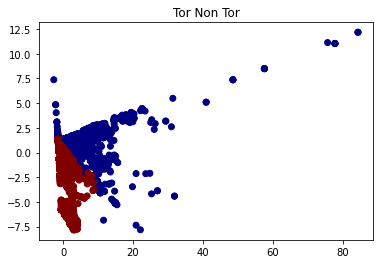

In [ ]:
from sklearn.decomposition import PCA
train_PCA = PCA(n_components=2).fit_transform(X_sm)
import matplotlib
%matplotlib inline
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
plt.title('Tor Non Tor')
plt.scatter(train_PCA[:,0],train_PCA[:,1],c=y_sm,cmap=plt.cm.jet)

In [ ]:
pca = PCA(n_components=2)
X_transform = pca.fit_transform(X_sm)

In [ ]:
X_transform = pd.DataFrame(data = X_transform, columns = ["principal component 1", "principal component 2"])
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_sm, test_size=0.20, random_state=32)
Scaler_X = StandardScaler()
#X_train = Scaler_X.fit_transform(X_train)
#X_test = Scaler_X.transform(X_test)
from sklearn.metrics import classification_report

In [ ]:
X_train

,principal component 1,principal component 2
12609,-0.546425,-0.088645
6165,-1.338884,1.073181
8200,-0.933456,-2.355593
3726,-1.201002,0.756017
3076,-0.225872,-0.158185
...,...,...
13285,-1.261144,0.219498
6745,-1.398111,1.169745
9526,9.723603,-2.881124
9771,14.887675,-5.089710


In [ ]:
tic=time.time()
model = KNeighborsClassifier(n_neighbors=16,p=1 )
model.fit(X_train, y_train)
Accuracy = model.score(X_test, y_test)
print(Accuracy)
print("Time Taken with PCA:")
toc=time.time()
print(toc-tic)

0.9756915339480302
Time Taken with PCA:
0.2628180980682373


In [ ]:
tic=time.time()
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with PCA:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1790
           1       1.00      0.96      0.98      1789

    accuracy                           0.98      3579
   macro avg       0.98      0.98      0.98      3579
weighted avg       0.98      0.98      0.98      3579

Time Taken with PCA:
2.9730098247528076


In [ ]:
tic=time.time()
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

toc=time.time()
print("Time Taken with PCA:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1785
           1       0.97      0.98      0.98      1794

    accuracy                           0.98      3579
   macro avg       0.98      0.98      0.98      3579
weighted avg       0.98      0.98      0.98      3579

Time Taken with PCA:
0.07618904113769531


In [ ]:
tic=time.time()
classifier = RF(n_estimators=10, criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with PCA:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1785
           1       0.98      0.97      0.98      1794

    accuracy                           0.98      3579
   macro avg       0.98      0.98      0.98      3579
weighted avg       0.98      0.98      0.98      3579

Time Taken with PCA:
0.2569577693939209


In [ ]:
tic=time.time()
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with PCA:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1785
           1       0.95      0.92      0.94      1794

    accuracy                           0.94      3579
   macro avg       0.94      0.94      0.94      3579
weighted avg       0.94      0.94      0.94      3579

Time Taken with PCA:
0.0652170181274414


# SMOTE + AutoEncoder

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_sm = Scaler_X.fit_transform(x_sm)


In [ ]:
encoder = Sequential()
encoder.add(Dense(units = 2, 
                  activation = 'relu', 
                  input_shape = [22]))

decoder = Sequential()
decoder.add(Dense(units = 22, 
                  activation = 'relu',
                  input_shape = [2]))

In [ ]:
Autoencoder = Sequential([encoder, decoder])

In [ ]:

from tensorflow.keras.optimizers import Adam

Autoencoder.compile(loss = 'mse', optimizer= 'adam')



In [ ]:
Autoencoder.fit(X_sm,
                X_sm,
                epochs = 200)

Epoch 1/200
560/560 [==============================] - 1s 2ms/step - loss: 0.6571
Epoch 2/200
560/560 [==============================] - 1s 2ms/step - loss: 0.6569
Epoch 3/200
560/560 [==============================] - 1s 2ms/step - loss: 0.6572
Epoch 4/200
560/560 [==============================] - 1s 2ms/step - loss: 0.6572
Epoch 5/200
560/560 [==============================] - 2s 3ms/step - loss: 0.6573
Epoch 6/200
560/560 [==============================] - 1s 2ms/step - loss: 0.6567
Epoch 7/200
560/560 [==============================] - 1s 2ms/step - loss: 0.6562
Epoch 8/200
560/560 [==============================] - 1s 3ms/step - loss: 0.6570
Epoch 9/200
560/560 [==============================] - 1s 2ms/step - loss: 0.6573
Epoch 10/200
560/560 [==============================] - 1s 3ms/step - loss: 0.6572
Epoch 11/200
560/560 [==============================] - 1s 2ms/step - loss: 0.6571
Epoch 12/200
560/560 [==============================] - 1s 3ms/step - loss: 0.6571
Epoch 13/200


560/560 [==============================] - 1s 2ms/step - loss: 0.6570
Epoch 197/200
560/560 [==============================] - 1s 2ms/step - loss: 0.6568
Epoch 198/200
560/560 [==============================] - 1s 2ms/step - loss: 0.6571
Epoch 199/200
560/560 [==============================] - 1s 2ms/step - loss: 0.6572
Epoch 200/200
560/560 [==============================] - 1s 2ms/step - loss: 0.6572


In [ ]:
features_2d = encoder.predict(X_sm)

In [ ]:
features_2d.shape

(17892, 2)

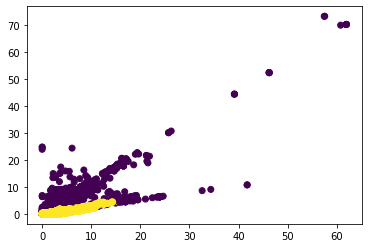

In [ ]:
plt.scatter(features_2d[:,0],features_2d[:,1], c = y_sm);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=32)
from sklearn.metrics import classification_report

In [ ]:
import time
tic=time.time()
model = KNeighborsClassifier(n_neighbors=2,p=1 )
model.fit(X_train, y_train)
Accuracy = model.score(X_test, y_test)
print(Accuracy)
print("Time Taken with AutoEncoder for KNN:")
toc=time.time()
print(toc-tic)

0.9991617770326907
Time Taken with AutoEncoder for KNN:
2.6153252124786377


In [ ]:
tic=time.time()
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with autoencoder for SVM:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1785
           1       1.00      0.96      0.98      1794

    accuracy                           0.98      3579
   macro avg       0.98      0.98      0.98      3579
weighted avg       0.98      0.98      0.98      3579

Time Taken with autoencoder for SVM:
2.6503775119781494


In [ ]:
tic=time.time()
classifier = DT(criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken for Decision Tree with autoencoder:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1785
           1       1.00      1.00      1.00      1794

    accuracy                           1.00      3579
   macro avg       1.00      1.00      1.00      3579
weighted avg       1.00      1.00      1.00      3579

Time Taken for Decision Tree with autoencoder:
0.20014452934265137


In [ ]:
tic=time.time()
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with autoencoder for Logistic Regression:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1785
           1       1.00      0.97      0.98      1794

    accuracy                           0.98      3579
   macro avg       0.99      0.98      0.98      3579
weighted avg       0.99      0.98      0.98      3579

Time Taken with autoencoder for Logistic Regression:
0.3039989471435547


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
tic=time.time()
classifier = RF(n_estimators=4, criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with autoencoder for Random Forest:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1785
           1       1.00      1.00      1.00      1794

    accuracy                           1.00      3579
   macro avg       1.00      1.00      1.00      3579
weighted avg       1.00      1.00      1.00      3579

Time Taken with autoencoder for Random Forest:
0.14812397956848145


# SMOTE + TSNE

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


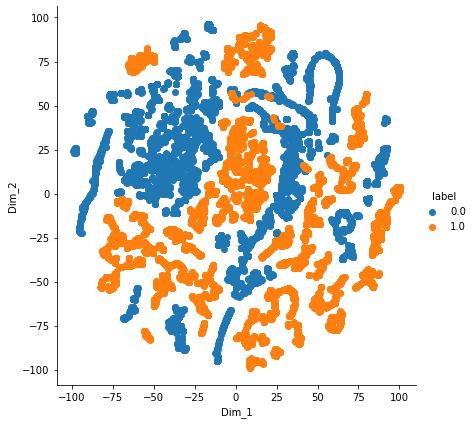

In [ ]:

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(X_sm)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_sm)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [ ]:
X_transform =  model.fit_transform(X_sm)
X_transform

array([[-35.086075, -40.966965],
       [-53.94424 , -25.542696],
       [-27.94728 , -26.443289],
       ...,
       [ 90.76152 , -28.36036 ],
       [ 92.86783 , -28.09871 ],
       [ 92.79133 , -28.52181 ]], dtype=float32)

In [ ]:
X_transform = pd.DataFrame(data = X_transform, columns = ["TSNE component 1", "TSNE component 2"])
X_train, X_test, y_train, y_test = train_test_split(tsne_data, y_sm, test_size=0.20, random_state=32)
from sklearn.metrics import classification_report

In [ ]:
import time
tic=time.time()
model = KNeighborsClassifier(n_neighbors=4,p=1 )
model.fit(X_train, y_train)
Accuracy = model.score(X_test, y_test)
print(Accuracy)
print("Time Taken with TSNE for KNN:")
toc=time.time()
print(toc-tic)

0.9988823693769209
Time Taken with TSNE for KNN:
0.2599954605102539


In [ ]:
tic=time.time()
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with TSNE for SVM:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1785
           1       1.00      1.00      1.00      1794

    accuracy                           1.00      3579
   macro avg       1.00      1.00      1.00      3579
weighted avg       1.00      1.00      1.00      3579

Time Taken with TSNE for SVM:
0.35479092597961426


In [ ]:
tic=time.time()
classifier = DT(criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken for Decision Tree with TSNE:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1785
           1       1.00      1.00      1.00      1794

    accuracy                           1.00      3579
   macro avg       1.00      1.00      1.00      3579
weighted avg       1.00      1.00      1.00      3579

Time Taken for Decision Tree with TSNE:
0.02293705940246582


In [ ]:
tic=time.time()
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with TSNE for Logistic Regression:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1785
           1       1.00      1.00      1.00      1794

    accuracy                           1.00      3579
   macro avg       1.00      1.00      1.00      3579
weighted avg       1.00      1.00      1.00      3579

Time Taken with TSNE for Logistic Regression:
0.12067556381225586


In [ ]:
tic=time.time()
classifier = RF(n_estimators=10, criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with PCA:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1785
           1       1.00      1.00      1.00      1794

    accuracy                           1.00      3579
   macro avg       1.00      1.00      1.00      3579
weighted avg       1.00      1.00      1.00      3579

Time Taken with PCA:
0.16256475448608398
